In [6]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

In [7]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [8]:
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]

In [9]:
#numpy 이어붙이기
a = [1,2,3]
b = [4,5,6]

#column_stack 은 2개의 리스트를 나란히 이어붙인다.(튜플로 붙임)
np.column_stack([a,b])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [10]:
fish_data2 = np.column_stack([fish_length,fish_weight])

In [11]:
print(fish_data[:5]) == print(fish_data2[:5])


[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


True

In [12]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
# 훈련과 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

In [14]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data2, fish_target, random_state=42
)

In [15]:
print(train_input.shape,test_input.shape)

(36, 2) (13, 2)


In [16]:
#샘플링 편향방지
train_input, test_input, train_target, test_target = train_test_split(
    fish_data2, fish_target, stratify=fish_target,random_state=42
)

In [17]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
#평가모델생성(퍼펙트)
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [19]:
# 수상한 도미한마리의 평가결과는!?(빙어)
print(kn.predict([[25,150]]))

[0.]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


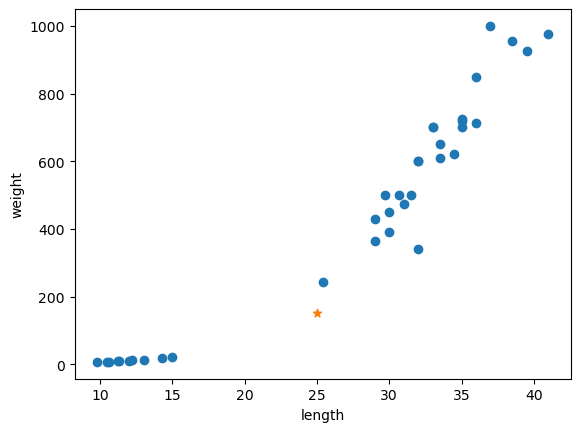

In [20]:
#사실일까?
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='*') #마커는 매개변수 모양을 지정한다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
#도미로 예측해야했는데 왜 빙어로?? 샘플의 주변 샘플을 알아보자!
# 가장 가까운 이웃을 찾아주는 kneighbors 메소드 사용 (기본값이 5개이므로 5개씩반환)
distances, indexes = kn.kneighbors([[25,150]])
distances, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]], dtype=int64))

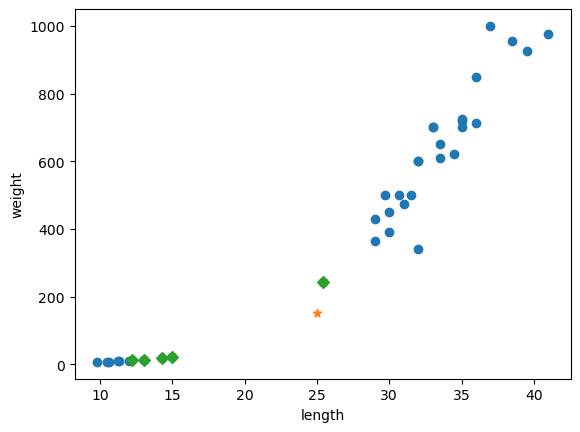

In [22]:
#D는 마름모형태로 마커함!
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='*') #마커는 매개변수 모양을 지정한다
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#5개의 샘플이 초록다이아몬드, 도미는 하나밖에없다! 나머지는 빙어!

In [23]:
# 직접 데이터를 확인해보자
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [24]:
#타깃데이터로 확인
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [25]:

#산점도를 보면 도미와 가까워보이는데 왜 빙어로예측했을까?
print(distances)


[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [26]:
#스케일의 차이때문에 발생한문제! 따라서 데이터를 전처리하자(표준점수이용)
mean = np.mean(train_input, axis=0) #평균계산
std = np.std(train_input, axis=0) #표준편차 

print(mean, std)


[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


# 그림
![nn](img/sca1.png)

In [28]:
#넘파이의 브로드캐스팅을 통한 마이너스
train_scaled = (train_input - mean)/std

# 그림
![nn](img/sca3.png)

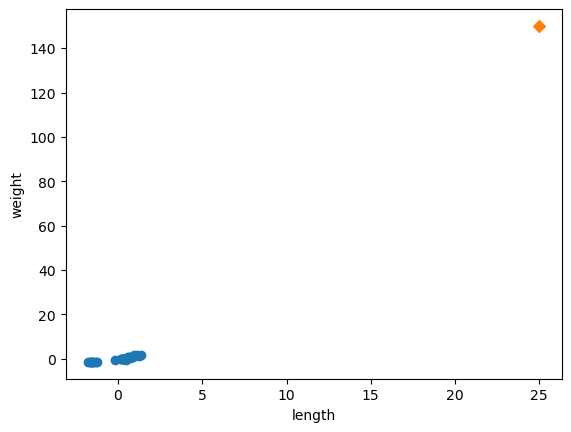

In [ ]:
#전처리 모델로 훈련시키기(변환이 안되 생긴오류.)
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150, marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

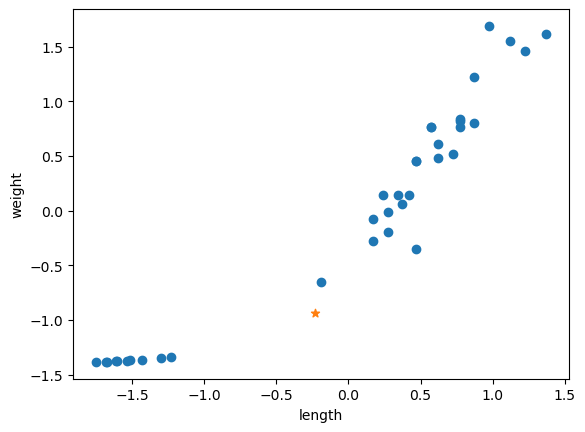

In [ ]:
#전처리모델로 다시(샘플데이터 변환)
new = ([25,150] - mean) / std
#전처리 모델로 훈련시키기(변환이 안되 생긴오류.)
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#이제 훈련시켜보자!
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [ ]:
#그럼이제 수상한 도미를 예측해보자!(정확히 도미로 예측함)
print(kn.predict([new]))

[1.]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


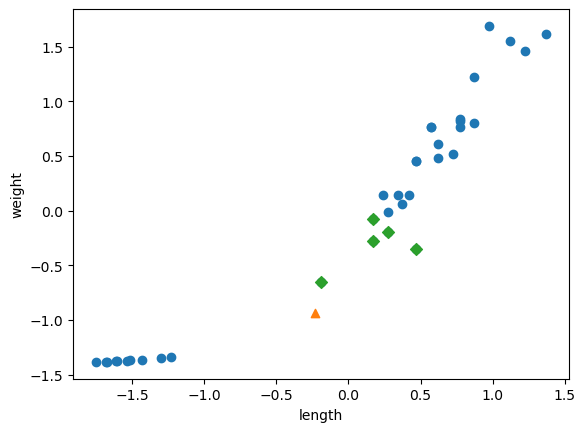

In [ ]:
#산점도를 그려보자
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()